# Table of Contents

1. [Loading and Preprocessing the Data](#1-Loading-and-Preprocessing-the-Data) <br>
    1.1 [Data Preprocessing](#1-1-Data-Preprocessing) <br> 
2. [Exploratory Data Analysis (EDA)](#2-Exploratory-Data-Analysis-(EDA)) <br> 
    2.1 [Mathematical Background: Principal Component Analysis (PCA)](#2-1-Mathematical-Background:-Principal-Component-Analysis-(PCA)) <br> 
3. [PCA Implementation and Interpretation](#3-PCA-Implementation-and-Interpretation) <br>
    3.1 [PCA Implementation](#3-1-PCA-Implementation) <br>
    3.2 [Mathematical Background: Explained Variance](#3-2-Mathematical-Background:-Explained-Variance) <br>
    3.3 [Explained Variance](#3-3-Explained-Variance-and-Scree-Test) <br>
    3.4 [Cumulative Explained Variance](#3-4-Cumulative-Explained-Variance)
4. [Visualization of PCA Results](#4-Visualization-of-PCA-Results) <br>
    4.1 [Mathematical Background: PCA Visualization](#4-1-Mathematical-Background:-PCA-Visualization) <br>
5. [Dimensionality Reduction for Machine Learning](#5-Dimensionality-Reduction-for-Machine-Learning) <br>
    5.1 [PCA for Dimensionality Reduction](#5-1-PCA-for-Dimensionality-Reduction)<br>
    5.2 [Machine Learning Model with PCA](#5-2-Machine-Learning-Model-with-PCA) <br>
    5.3 [Model without PCA](#5-3-Model-without-PCA) <br> 
6. [Interpretation](#6-Interpretation) <br> 
    6.1 [Why PCA sometimes performs better](#6-1-Why-PCA-sometimes-performs-better) <br> 

<a id="1-Loading-and-Preprocessing-the-Data"></a>

# 1. Loading and Preprocessing the Data  

First, we load the dataset. For this project, we use the Wine dataset, which contains 13 features related to the chemical properties of wines from three different regions.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Wine dataset
from sklearn.datasets import load_wine
data = load_wine()

# Create a DataFrame for easier use
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

# Display the first few rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<a id="1-1-Data-Preprocessing"></a>

### 1.1 Data Preprocessing 

Before applying PCA, we need to preprocess the data. PCA is sensitive to the variance of features, so it’s essential to standardize the data.

In [2]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back into DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first rows of the standardized data
X_scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


<a id="2-Exploratory-Data-Analysis-(EDA)"></a>

## 2. Exploratory Data Analysis (EDA) 

Before moving on to PCA, we should perform some basic EDA to understand the dataset. We’ll examine the correlation matrix, pair plots, and variance between features.

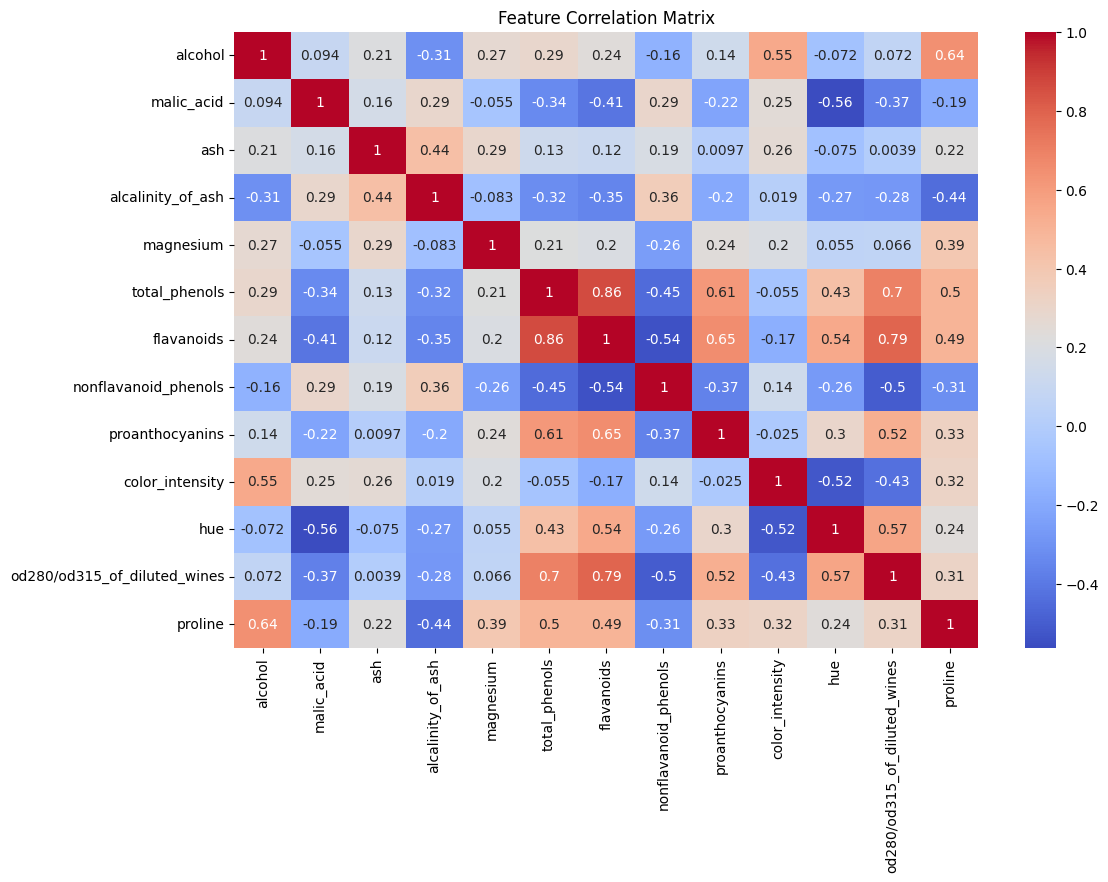

In [3]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

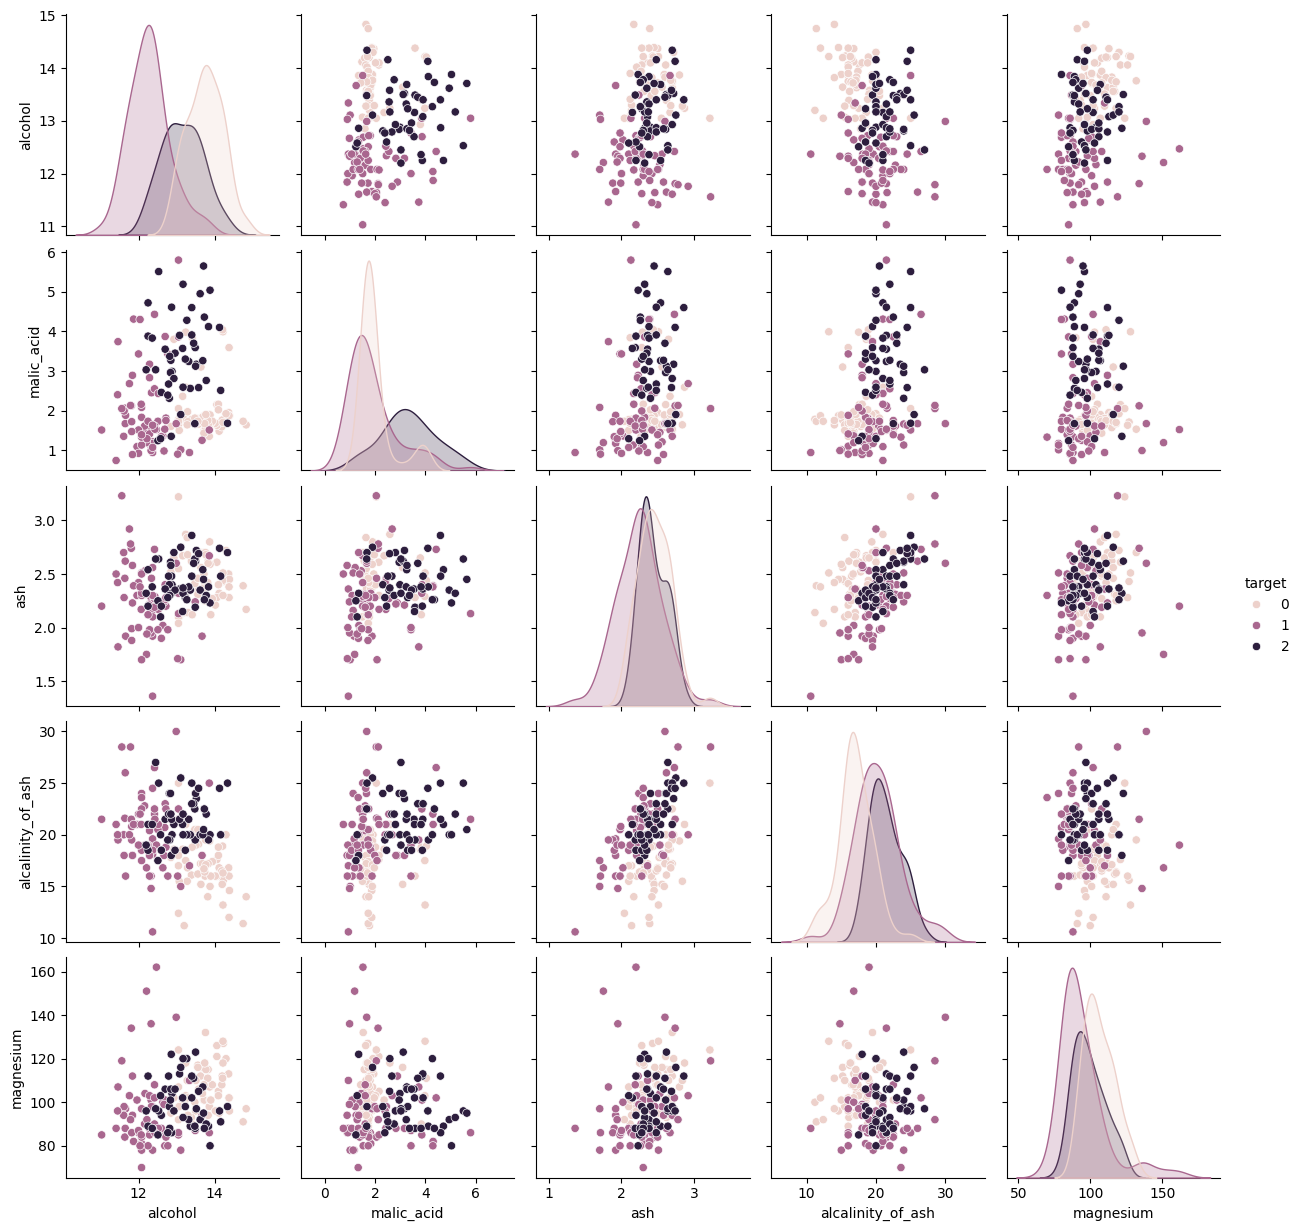

In [4]:
# Pairplot for a few features
sns.pairplot(df, hue='target', vars=df.columns[:5])
plt.show()

<a id="2-1-Mathematical-Background:-Principal-Component-Analysis-(PCA)"></a>

### 2.1 Mathematical Background: Principal Component Analysis (PCA) 

Principal Component Analysis (PCA) is a method for **dimensionality reduction** that transforms the original features of a dataset into a smaller number of variables called principal components.

PCA performs a **linear transformation** in which new axes (principal components) are chosen so that the data vary maximally along these new axes.

The mathematical definition of PCA involves computing the **eigenvectors** and **eigenvalues** of the covariance matrix of the standardized data. The eigenvectors determine the direction of the new axes, while the eigenvalues describe the variance along these axes.

For a dataset $( X $) with $( n $ observations and $ p $ features:
1. First, compute the **covariance matrix** $( \Sigma = \frac{1}{n-1} X^TX $).
2. Then compute the **eigenvectors** $ v_i $ and **eigenvalues** $( \lambda_i $) of $( \Sigma $).
3. The eigenvectors determine the **principal components**, and the associated eigenvalues indicate how much variance is explained by each principal component.

The first principal component explains the largest variance of the data, the second the second-largest, and so on.

Dimension reduction occurs by using only the first $( k $) principal components that explain the majority of the variance.

<a id="3-PCA-Implementation-and-Interpretation"></a>

## 3. PCA Implementation and Interpretation  


Next, we will apply PCA to the scaled data. PCA will help us reduce the dimensionality of the dataset and capture the most important information.

<a id="3-1-PCA-Implementation"></a>

### 3.1 PCA Implementation

In [5]:
# Apply PCA
pca = PCA(n_components=None) # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y

# Display explained variance of each component
print("Explained variance by each principal component:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}")  

Explained variance by each principal component:
Principal Component 1: 0.3620
Principal Component 2: 0.1921
Principal Component 3: 0.1112
Principal Component 4: 0.0707
Principal Component 5: 0.0656
Principal Component 6: 0.0494
Principal Component 7: 0.0424
Principal Component 8: 0.0268
Principal Component 9: 0.0222
Principal Component 10: 0.0193
Principal Component 11: 0.0174
Principal Component 12: 0.0130
Principal Component 13: 0.0080


<a id="3-2-Mathematical-Background:-Explained-Variance"></a>
### 3.2 Mathematical Background: Explained Variance

The explained variance ratios of PCA indicate how much of the total variance in the data is explained by each of the new principal components. Each principal component is chosen to explain a maximum portion of the variance in the data.

Mathematically, the **explained variance** is $( \lambda_i / \sum \lambda $), where $( \lambda_i $) is the eigenvalue of the $( i $)-th principal component. The eigenvalue corresponds to the variance that exists along the direction of the associated eigenvector.

If the first $( k $) principal components explain a sufficiently large amount of the variance (for example, 95%), we can reduce the dimension of the data to these $( k $) components without losing significant information.

<a id="3-3-Explained-Variance-and-Scree-Test"></a>
### 3.3 Explained Variance and Scree Test

A Scree Plot is helpful for understanding how much variance is explained by each principal component. We can use it to decide how many components to retain.

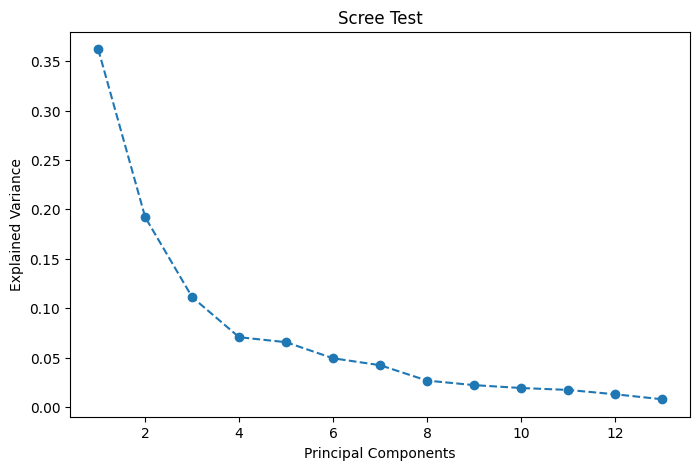

In [6]:
# Scree Test
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Test')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

<a id="3-4-Cumulative-Explained-Variance"></a>
### 3.4 Cumulative Explained Variance

Now we calculate the cumulative explained variance to determine the number of components that explain a significant portion of the variance (e.g., 95%).

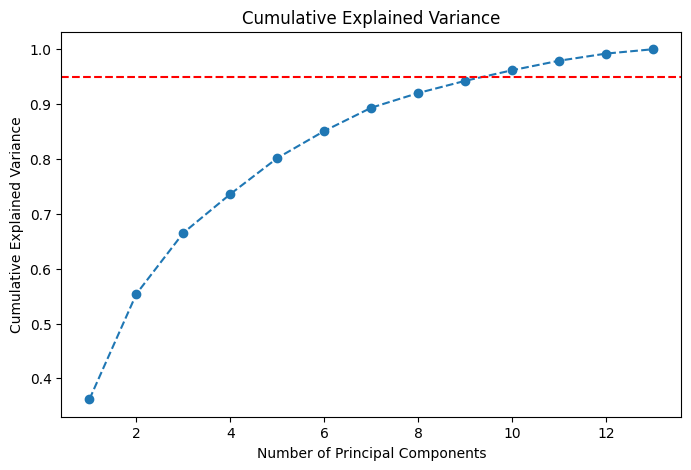

Number of principal components explaining 95% of variance: 10


In [7]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Determine the number of components that explain 95% of the variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of principal components explaining 95% of variance: {num_components}")

<a id="4-Visualization-of-PCA-Results"></a>
## 4. Visualization of PCA Results

Now we will visualize the data in the new PCA-transformed space. Using the first two principal components, we can create a 2D scatter plot to check how well PCA separates the data.

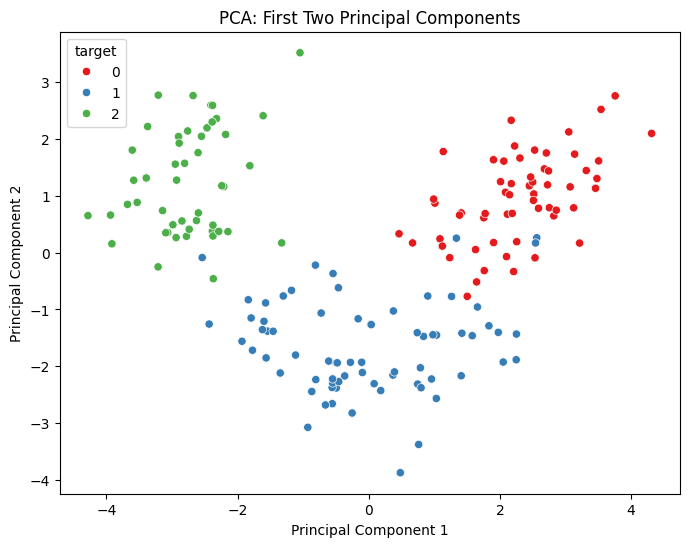

In [8]:
# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='Set1')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<a id="4-1-Mathematical-Background:-PCA-Visualization"></a>

### 4.1 Mathematical Background: PCA Visualization

The visualization of the first two principal components shows the projection of the high-dimensional data into a two-dimensional space containing the maximum variance of the data. Since PCA maximizes the variance, the data are stretched along these new axes, making patterns and clusters in the data more visible.

This projection is used to visualize relationships between observations and the separation of classes (target variable) when using the first two principal components.

<a id="5-Dimensionality-Reduction-for-Machine-Learning"></a>

## 5. Dimensionality Reduction for Machine Learning

Now that we understand the transformation, we will reduce the dimensionality of our dataset based on the number of principal components that explain 95% of the variance and use it for a classification task.

<a id="5-1-PCA-for-Dimensionality-Reduction"></a>
### 5.1 PCA for Dimensionality Reduction

In [9]:
# Reduce data to the first 'num_components' principal components
pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(X_scaled)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

<a id="5-2-Machine-Learning-Model-with-PCA"></a>

### 5.2 Machine Learning Model with PCA

We will use a Random Forest classifier to evaluate the impact of PCA on model performance. First, the model is trained on the reduced dataset.

Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



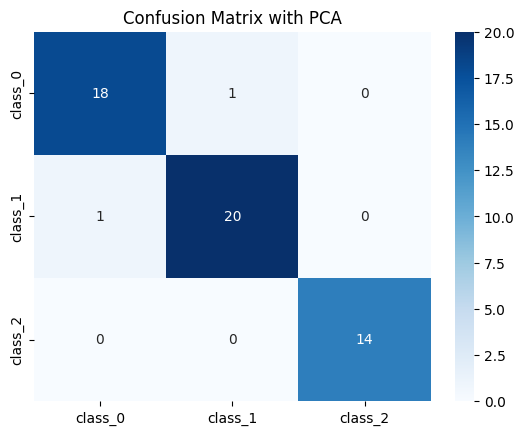

In [10]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred = clf.predict(X_test)
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix with PCA')
plt.show()

<a id="5-3-Model-without-PCA"></a>
### 5.3 Model without PCA

Classification Report without PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



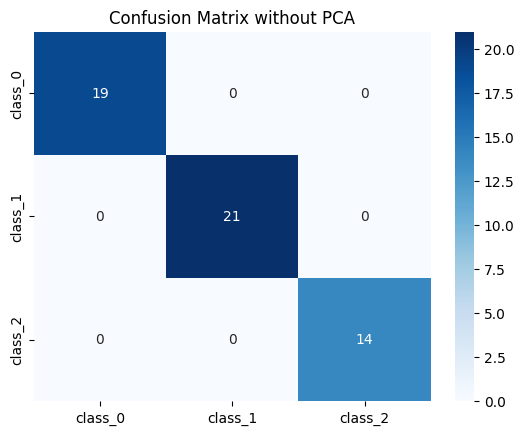

In [11]:
# Split original data (without PCA)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model on original data
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

# Predictions and evaluation
y_pred_orig = clf_orig.predict(X_test_orig)
print("Classification Report without PCA:")
print(classification_report(y_test_orig, y_pred_orig))

# Confusion matrix for original data
conf_matrix_orig = confusion_matrix(y_test_orig, y_pred_orig)
sns.heatmap(conf_matrix_orig, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix without PCA')
plt.show()

<a id="6-Interpretation"></a>
## 6. Interpretation

The model **without PCA** tends to have higher accuracy, as it uses all original features without reducing information. If the original features all contain relevant information and are not highly correlated, PCA may lead to the loss of some information that could be important for classification.

The model **with PCA** may show slightly lower accuracy since PCA reduces the dimensionality of the data by transforming it into principal components. PCA removes redundancies but could also remove information important for predictions. PCA is particularly useful when there are many redundant or highly correlated features, which may not be the case in this dataset.

<a id="6-1-Why-PCA-sometimes-performs-better"></a>
### 6.1 Why PCA sometimes performs better:

PCA can be particularly beneficial when the original features:
- Are **high-dimensional** (many features relative to observations).
- Contain **highly correlated** features, creating redundancies in the model.
- Influence the model through noise (i.e., some features are irrelevant or noisy).

In such cases, PCA can improve model performance by retaining only essential information. However, since the Wine dataset is well-structured and not particularly high-dimensional, PCA did not provide a significant improvement in this case.